<a href="https://colab.research.google.com/github/AbrahamKong/-CMPE257-NLP_Poem_Part_2/blob/main/NLP_Poem_Scraping_9b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

#NLP Part 1 : Poetry Analysis

*   NLP Basics
*   NER, POS, vectorization / embeddings
*   Word2Vec, Glove, Cove, FastText, etc.
*.  Similarity of words, context




1. NLP Data. Pick 2 poets, scrape 10 poems each . Put them in a json datastructure and save it under the poets name, in your team drive under folder 'DataSets' in the drive shared with you. 

2. CLAIM YOUR POETS!!! Note: your team has  to claim their 2 poets by entering in their names in this spreadsheet with a timestamp of when you entered this: no duplicate poets allowed !
https://docs.google.com/spreadsheets/d/1-KQVrGrbz5PvLhJNXhWm55WPIpmJPvsQQ2r9U-ZieGw/edit#gid=0

---for each poem of each poet:
3. Run POS and extract verbs, nouns and adjectives (use notebook given as an example)

4. Summarize each poem 

5. Store the summary, POS data in your json poet data structure and save to disk.

6. Interchange the verbs and adjectives of the two poets based on similar words in the other poets vocabulary of verbs and adjectives

6. a. save the data structure for the new poems:  poet1-poet2-poem1.json (replace poet1 adjectives and verbs with poet2's ) and poet2-poet1-poem1.json 

6. b. print out the new poems and save them to disk poet1-poet2.txt and poet2-poet1.txt [these files will contain 10 poems each)].
remember to measure and compare the cohesion and perplexity of the original poems and the new poems you generate !!

7. Combine poet1's and poet2's poem text and summarize it using the transformer

8. Run topic modeling on the combined text of each poet: what are the top 5 topics they are writing about?

9. Name the topics: use the new notebook : name_your_topic_background.ipynb (Links to an external site.) , to try and find the closest word that describes topic 0, topic 1, topic 2 : instead of topic 0, what is the closest word in that cluster that describes the topic?

# Claim 2 poets and Scrape 10 poems each
John Keats
Alfred Tennyson    

Scraping example colab: https://colab.research.google.com/drive/1Px_UggyRiQJzrIxvLtitz-Es0aZ5Au8b?authuser=3#scrollTo=3aTGAo7rMvjN&uniqifier=1



In [1]:
# !pip install nltk
# !pip install gensim
# !pip install transformers
# !pip install sentence-transformers
# !pip install pyLDAvis
# !pip install spacy
# !pip install contractions
# !pip install -U pandas-profiling
# !python -m spacy download en_core_web_lg

     |████████████████████████████████| 4.0 MB 8.7 MB/s 
     |████████████████████████████████| 895 kB 34.2 MB/s 
     |████████████████████████████████| 596 kB 40.8 MB/s 
     |████████████████████████████████| 6.6 MB 47.8 MB/s 
     |████████████████████████████████| 77 kB 4.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 79 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 18.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=c458a43479bb20d66e021fe947569a6d07b411b8291ee3f3b8320bae84dc231a
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements 

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import wordcloud
import nltk
import unicodedata
import contractions
import pickle
import urllib.request
import requests
import spacy
import json
%matplotlib inline

from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from contractions import contractions_dict
from scipy import stats
from scipy import sparse

import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# NLP Data. Pick 2 poets, scrape 10 poems each . Put them in a json datastructure and save it under the poets name, in your team drive under folder 'DataSets'

## Get Scraped Data

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Please change the file path in order for the code to run

In [4]:
# filepath = '/content/drive/MyDrive/DataSets/'
filepath = '/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/'

In [5]:
lh_df = pd.read_csv('https://raw.githubusercontent.com/AbrahamKong/-CMPE257-NLP_Poem_Part_2/main/langston_hughes.csv')

In [6]:
lh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10 non-null     object
 1   Poem    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [7]:
mjo_df = pd.read_csv('https://raw.githubusercontent.com/AbrahamKong/-CMPE257-NLP_Poem_Part_2/main/mary_j_oliver.csv')

In [8]:
mjo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10 non-null     object
 1   Poem    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


## JSON Conversion

In [9]:
result_lh = lh_df.to_json(orient="index")
parsed_lh = json.loads(result_lh)
json.dumps(parsed_lh, indent=4)

'{\n    "0": {\n        "Title": "Mother To Son",\n        "Poem": "well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor\\u2014 bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps cause you finds it kinder hard do not you fall now\\u2014 for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes"\n    },\n    "1": {\n        "Title": "The Ballad Of The Landlord",\n        "Poem": "landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you t

In [10]:
with open((filepath + 'langston_hughes.csv'), 'w') as outfile:
    json.dump(result_lh, outfile)

In [11]:
result_mjo = mjo_df.to_json(orient="index")
parsed_mjo = json.loads(result_mjo)
json.dumps(parsed_mjo, indent=4)

'{\n    "0": {\n        "Title": "In Blackwater woods",\n        "Poem": "look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes"\n    },\n    "1": {\n        "Title": "The Journey",\n        "Poem": "one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house 

In [12]:
with open((filepath + 'mary_j_oliver.csv'), 'w') as outfile:
    json.dump(result_mjo, outfile)

In [13]:
parsed_mjo["0"]

{'Poem': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'Title': 'In Blackwater woods'}

## Build JSON Structure

In [14]:
langston_hughes = {

}

mary_j_oliver = {

}

## Data Cleaning

In [15]:
def cleanPoemText(text):
    

    text = contractions.fix(text)
    
    text = text.strip().lower()
    
    text = re.sub(r"'", ' ', text)
    
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    text = ' '.join([w for w in text.split()])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

## Clean Poem Text

In [16]:
embedding = ''
def buildPoemArray(poet, data):
  poems = []
  for i in data:
    poem = data[i]["Poem"]

    clean_poem = cleanPoemText(poem)
    idx = "poem" + str(i)
    poet[idx] = clean_poem
    poems.append(idx)
  poet['poems_array'] = poems


In [17]:
buildPoemArray(langston_hughes, parsed_lh)
buildPoemArray(mary_j_oliver, parsed_mjo)

In [18]:
langston_hughes

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [19]:
mary_j_oliver

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [20]:
langston_hughes_poems = langston_hughes.copy()
mary_j_oliver_poems = mary_j_oliver.copy()

# Run Part-Of-Speech, extract verbs, nouns and adjectives

In [21]:
def getPOS(poet):
  global_vrb= set()
  global_nns= set()
  global_adj= set()
  for key in poet['poems_array']:
    text = poet[key]
    wrd_list = word_tokenize(text)
    pos_val = nltk.pos_tag(wrd_list)
    poet["pos_"+key] = pos_val

    vrb = set([word for (word, pos) in pos_val if (pos.startswith('VB'))])
    nns = set([word for (word, pos) in pos_val if (pos.startswith('NN'))])
    adj = set([word for (word, pos) in pos_val if (pos.startswith('JJ'))])

    poet["verbs_"+key] = list(vrb)
    poet["adjectives_"+key] = list(adj)
    poet["nouns_"+key] = list(nns)

    global_vrb = set.union(global_vrb, vrb)
    global_nns = set.union(global_nns, nns)
    global_adj = set.union(global_adj, adj)

  poet['all_verbs'] = list(global_vrb)
  poet['all_nouns'] = list(global_nns)
  poet['all_adjectives'] = list(global_adj)

In [22]:
langston_hughes_pos = langston_hughes.copy()
getPOS(langston_hughes_pos)
# langston_hughes_pos

In [23]:
langston_hughes

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [24]:
mary_j_oliver_pos = mary_j_oliver.copy()
getPOS(mary_j_oliver_pos)
# mary_j_oliver_pos

In [25]:
mary_j_oliver

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

# Store the POS JSON Data to File

In [26]:
with open((filepath + 'langston_hughes_pos_final.json'), 'w') as outfile:
    json.dump(langston_hughes_pos, outfile)

In [27]:
with open((filepath + 'mary_j_oliver_pos_final.json'), 'w') as outfile:
    json.dump(mary_j_oliver_pos, outfile)

# Summarization using transformers

In [28]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [29]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [30]:
def getSummaryOfPoem(poet):
  def removeQuotes(mydata):
    new_data = mydata.strip('“”')
    return new_data
  count = 0
  for key in poet['poems_array']:
    count += 1;
    text = poet[key] 
    text = removeQuotes(text)
    summary_text = summarizer(text, max_length=512, min_length=5, do_sample=False)[0]['summary_text']
    poet["summary_"+key] = summary_text
  
  return poet

In [31]:
from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

import timeit

start = timeit.default_timer()

2022-04-22 23:51:10
2022-04-22 23:51:10


In [32]:
langston_hughes_sum = langston_hughes.copy()
mary_j_oliver_sum = mary_j_oliver.copy()
data_langston_hughes = getSummaryOfPoem(langston_hughes_sum)
data_mary_j_oliver = getSummaryOfPoem(mary_j_oliver_sum)

Your max_length is set to 512, but you input_length is only 144. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)
Your max_length is set to 512, but you input_length is only 284. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=142)
Your max_length is set to 512, but you input_length is only 110. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 512, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 512, but you input_length is only 466. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=233)
Your max_length is set to 512, but you input_length is only 170. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=85)
Your max_length is set to 512, but you input_length is only 218. You might

In [33]:


#Your statements here

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  908.4393164559999


In [34]:
langston_hughes_sum

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [35]:
mary_j_oliver_sum

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [ ]:
data_mary_j_oliver

# Store the summarized JSON Data to File

In [37]:
with open((filepath + 'langston_hughes_summary_final.json'), 'w') as outfile:
    json.dump(langston_hughes_sum, outfile)

In [38]:
with open((filepath + 'mary_j_oliver_summary_final.json'), 'w') as outfile:
    json.dump(mary_j_oliver_sum, outfile)

# Interchange the Verbs and Adjectives for both the poets using transformer

In [39]:
model = SentenceTransformer('stsb-roberta-large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [40]:
def getSemanticSimilarity(p1,p2):
  embedding1 = model.encode(p1, convert_to_tensor=True)
  embedding2 = model.encode(p2, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
  print(cosine_scores) 
  similarity_score = cosine_scores.item()
  return similarity_score

In [41]:
getSemanticSimilarity(langston_hughes_pos['all_verbs'][0],mary_j_oliver_pos["all_verbs"][0])

tensor([[0.2940]])


0.2940179705619812

# Swapping the Verbs based on similarity score

In [42]:

def swapVerbs(p1,p2,text):
    for v1 in p1:
      for v2 in p2:
        score = getSemanticSimilarity(v1,v2)
        if score > 0.3:
          text = text.replace(v1,v2)
          print("verb")
          print(text)
          break
    return text

# Swapping the Adjectives based on similarity score

In [43]:
def swapAdjectives(p1,p2, poem):
  text = poem
  for a1 in p1:
    for a2 in p2:
      print("inside loop 2")
      print(a1)
      print(a2)
      print(text)
      score = getSemanticSimilarity(a1,a2)
      if score > 0.3:
        text = text.replace(a1,a2)
        print("adjective")
        print(text)
  return text

In [44]:
def swapIteration(poet1, poet2, text):
    p2_verbs = poet2["all_verbs"]
    p1_verbs = poet1["all_verbs"]
    p2_verbs = p2_verbs[0:2]
    p1_verbs = p1_verbs[0:2]
    print(p1_verbs)
    print(p2_verbs)
    new_text = swapVerbs(p1_verbs, p2_verbs, text)
    print("new text verbs")
    print(new_text)
    # print(text)
    p2_adjectives = poet2["all_adjectives"]
    p1_adjectives = poet1["all_adjectives"]
    p2_adjectives = p2_adjectives[0:2]
    p1_adjectives = p1_adjectives[0:2]
    brand_new_text = swapAdjectives(p1_adjectives, p2_adjectives, new_text)
    print("new text adjectives")
    print(brand_new_text)
    return brand_new_text

John Poems Swapped Verbs and Adjectives of Alfred Tennyson Poems

In [45]:
langston_hughes_poems_2 = langston_hughes_poems.copy()
langston_hughes_poems_2.pop('poems_array')
langston_hughes_poems_swapped=[]
for i in langston_hughes_poems:
  print("poems:")
  print(i)
  # inx = 'poem'+str(i);
  poem_str = str(langston_hughes_poems[i]);
  print(poem_str)

  langston_hughes_poems_swapped.append(swapIteration(langston_hughes_pos, mary_j_oliver_pos, poem_str))


poems:
poem0
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes
['police', 'find']
['leads', 'holding']
tensor([[0.2940]])
tensor([[0.3156]])
verb
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down o

# Printing the new poems after swapping

In [46]:
langston_hughes_poems_swapped

['well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the street u

## TODO: We need to format the poem in a human readable manner

 Alfred Tennyson Poems Swapped Verbs  and Adjectives of John Poems


In [47]:
mary_j_oliver_poems_swapped = []
mary_j_oliver_poems_2 = mary_j_oliver_poems.copy()
mary_j_oliver_poems_2.pop('poems_array')
for i in mary_j_oliver_poems:
  print("poems:")
  print(i)
  # inx = 'poem'+str(i);
  poem_str_2 = str(mary_j_oliver_poems[i]);
  print(poem_str_2)

  mary_j_oliver_poems_swapped.append(swapIteration(langston_hughes_pos, mary_j_oliver_pos, poem_str_2))


poems:
poem0
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes
['police', 'find']
['leads', 'holding']
tensor([[0.2940]])
tensor([[0.3156]])
verb
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away 

# Printing the new poems after swapping

In [48]:
mary_j_oliver_poems_swapped

['look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what you had to do thou

# Swapped Poem

In [49]:
def buildSwappedPoemArray(poet,data):
  poems = []
  data_length = len(data)
  for i in range(data_length):
    poem = data[i]
    #clean_poem = cleanPoemText(poem)
    idx = "poem" + str(i)
    poet[idx] = poem
    poems.append(idx)
  poet['poems_swapped_array'] = poems

In [50]:
langston_hughes_swapped = {

}

mary_j_oliver_swapped = {

}


In [51]:
langston_hughes_poems_swapped


['well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the street u

In [52]:
buildSwappedPoemArray(langston_hughes_swapped,langston_hughes_poems_swapped)
buildSwappedPoemArray(mary_j_oliver_swapped,mary_j_oliver_poems_swapped)

In [53]:
langston_hughes_swapped

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw 

In [54]:
langston_hughes_swapped_to_json_file = langston_hughes_swapped.copy()
langston_hughes_swapped_to_json_file.pop('poems_swapped_array')
langston_hughes_swapped_to_json_file.pop('poem10')

mary_j_oliver_swapped_to_json_file = mary_j_oliver_swapped.copy()
mary_j_oliver_swapped_to_json_file.pop('poems_swapped_array')
mary_j_oliver_swapped_to_json_file.pop('poem10')



"['poem0', 'poem1', 'poem2', 'poem3', 'poem4', 'poem5', 'poem6', 'poem7', 'poem8', 'poem9']"

In [55]:
langston_hughes_swapped_to_json_file


{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw 

In [56]:
mary_j_oliver_swapped_to_json_file

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [57]:
with open((filepath + 'langston_hughes_swapped_to_json_file_final.json'), 'w') as outfile:
    json.dump(langston_hughes_swapped_to_json_file, outfile)

In [58]:
with open((filepath + 'mary_j_oliver_swapped_to_json_file_final.json'), 'w') as outfile:
    json.dump(mary_j_oliver_swapped_to_json_file, outfile)

In [59]:
with open((filepath + 'langston_hughes_swapped_to_txt_file_final.txt'), 'w') as outfile:
    json.dump(langston_hughes_swapped_to_json_file, outfile)

In [60]:
with open((filepath + 'mary_j_oliver_swapped_to_txt_file_final.txt'), 'w') as outfile:
    json.dump(mary_j_oliver_swapped_to_json_file, outfile)

In [61]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import wordcloud
import nltk
import unicodedata
import contractions
import pickle
import urllib.request
import requests
import spacy
import json
%matplotlib inline

from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from contractions import contractions_dict
from scipy import stats
from scipy import sparse

import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [63]:
langston_hughes_choherence_input = langston_hughes.copy()
langston_hughes_choherence_input.pop('poems_array')
langston_hughes_choherence_input

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [64]:
swapped_langston_hughes_choherence_input = langston_hughes_swapped.copy()
swapped_langston_hughes_choherence_input.pop('poems_swapped_array')
swapped_langston_hughes_choherence_input

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw 

In [65]:
coherence_perplexity_calculator = mary_j_oliver.copy()
coherence_perplexity_calculator.pop('poems_array')
coherence_perplexity_calculator

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [66]:
swapped_coherence_perplexity_calculator = mary_j_oliver_swapped.copy()
swapped_coherence_perplexity_calculator.pop('poems_swapped_array')
swapped_coherence_perplexity_calculator

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [67]:
!pip install -upgrade gensim


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [68]:
!pip install pyLDAvis

# Run Topic Modelling on combined text

In [69]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
def choherence_perplexity_calculator(poem_list):
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(poem_list))

  print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
      return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
      return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      return texts_out
  # Remove Stop Words
  #data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN']) #, 'ADJ', 'VERB', 'ADV'

  print(data_lemmatized[:1])
  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  print(corpus[:1])
 
  # lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
  #                                           id2word=id2word,
  #                                           num_topics=10, 
  #                                           random_state=100,
  #                                           update_every=1,
  #                                           chunksize=100,
  #                                           passes=10,
  #                                           alpha='auto',
  #                                           per_word_topics=True)
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  print(lda_model.print_topics())
  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = gensimvis.prepare(lda_model, corpus, id2word)
  # vis
  # Compute Perplexity
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  return vis
  

In [70]:
poem_count = len(langston_hughes_choherence_input)
langston_poem_list=[]
for j in langston_hughes_choherence_input:
  poem_index =  str(j)
  print(poem_index)
  print(langston_hughes_choherence_input[poem_index])
  langston_poem_list.append(langston_hughes_choherence_input[poem_index])
print(langston_poem_list)

poem0
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes
poem1
landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the stree

# Original Langston Hughes Poem's perplexity and coherence score

In [71]:
pip install attrs==19.1.0

  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
visions 0.7.4 requires attrs>=19.3.0, but you have attrs 19.1.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [72]:
!pip install pandas --upgrade
# !pip install pandas==1.3.1

In [73]:
vis = choherence_perplexity_calculator(langston_poem_list)

[['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'it', 'had', 'tacks', 'in', 'it', 'and', 'splinters', 'and', 'boards', 'torn', 'up', 'and', 'places', 'with', 'no', 'carpet', 'on', 'the', 'floor', 'bare', 'but', 'all', 'the', 'time', 'se', 'been', 'climbin', 'on', 'and', 'reachin', 'landin', 'and', 'turnin', 'corners', 'and', 'sometimes', 'goin', 'in', 'the', 'dark', 'where', 'there', 'ai', 'not', 'been', 'no', 'light', 'so', 'boy', 'do', 'not', 'you', 'turn', 'back', 'do', 'not', 'you', 'set', 'down', 'on', 'the', 'steps', 'because', 'you', 'finds', 'it', 'kinder', 'hard', 'do', 'not', 'you', 'fall', 'now', 'for', 'se', 'still', 'goin', 'honey', 'se', 'still', 'climbin', 'and', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']]
['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'st

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['life', 'crystal', 'stair', 'tack', 'splinter', 'board', 'place', 'carpet', 'floor', 'time', 'landin', 'turnin', 'corner', 'dark', 'light', 'boy', 'step', 'honey', 'life', 'crystal', 'stair', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)]]
[(0, '0.040*"lip" + 0.040*"trumpet" + 0.039*"com" + 0.024*"oldpoetry" + 0.024*"man" + 0.024*"rent" + 0.024*"opoem" + 0.016*"jet" + 0.016*"negro" + 0.016*"music"'), (1, '0.004*"kitchen" + 0.004*"company" + 0.004*"poemid" + 0.004*"poem" + 0.004*"table" + 0.004*"brother" + 0.004*"charge" + 0.004*"purpose" + 0.004*"owner" + 0.004*"singlepoem"'), (2, '0.005*"child" + 0.005*"year" + 0.005*"dream" + 0.005*"sun" + 0.004*"prayer" + 0.004*"road" + 0.004*"blessing" + 0.004*"today" + 0.004*"night" + 0.004*"love"'), (3, '0.097*"river" + 0.034*"company" + 0.034*"kitchen" + 0.034*"owner" + 0.034*"sing

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.689902586618242

Coherence Score:  0.6053286614905561


In [74]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.191696  0.051327       1        1  28.012879
0      0.170784  0.137308       2        1  26.991815
5      0.080589 -0.182084       3        1  14.647371
4     -0.083585 -0.003276       4        1  10.811200
3      0.014511  0.014423       5        1   9.786500
7     -0.013739 -0.035551       6        1   8.762043
6      0.009510  0.000936       7        1   0.247048
1      0.004197  0.004550       8        1   0.247048
2      0.002582  0.004946       9        1   0.247048
9      0.006847  0.007421      10        1   0.247048, topic_info=        Term      Freq     Total Category  logprob  loglift
72     dream  8.000000  8.000000  Default  30.0000  30.0000
152    river  4.000000  4.000000  Default  29.0000  29.0000
86     child  7.000000  7.000000  Default  28.0000  28.0000
185  trumpet  4.000000  4.000000  Default  27.0000  27.0000
196      com  4.000000  4.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
116      sea  0.004533  2.898713  Topic10  -5.3566  -0.4573
82       bar  0.004393  2.079598  Topic10  -5.3881  -0.1566
8      honey  0.004373  1.830851  Topic10  -5.3926  -0.0338
121     soul  0.004395  3.317273  Topic10  -5.3875  -0.6231
12     owner  0.004347  7.279635  Topic10  -5.3985  -1.4200

[521 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
21        3  0.870109   anger
22        3  0.871929    bail
81        1  0.792055  banner
82        1  0.480862     bar
82        2  0.480862     bar
...     ...       ...     ...
63        3  0.870498    word
141       1  0.957677    work
142       1  0.531285   world
142       5  0.531285   world
143       1  0.876469    year

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 6, 5, 4, 8, 7, 2, 3, 10])

# **Love** is the Topic Name from based on the LDA model topics from Langston Hughes Poem's  (child, year, dream, night, sun)

In [75]:
poem_count = len(coherence_perplexity_calculator)
mary_poem_list=[]
for j in coherence_perplexity_calculator:
  poem_index =  str(j)
  print(poem_index)
  print(coherence_perplexity_calculator[poem_index])
  mary_poem_list.append(coherence_perplexity_calculator[poem_index])
print(mary_poem_list)

poem0
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes
poem1
one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what you had to d

# Original Mary J Oliver Poem's perplexity and coherence score

In [76]:
vis = choherence_perplexity_calculator(mary_poem_list)

[['look', 'the', 'trees', 'are', 'turning', 'their', 'own', 'bodies', 'into', 'pillars', 'of', 'light', 'are', 'giving', 'off', 'the', 'rich', 'fragrance', 'of', 'cinnamon', 'and', 'fulfillment', 'the', 'long', 'tapers', 'of', 'cattails', 'are', 'bursting', 'and', 'floating', 'away', 'over', 'the', 'blue', 'shoulders', 'of', 'the', 'ponds', 'and', 'every', 'pond', 'no', 'matter', 'what', 'its', 'name', 'is', 'is', 'nameless', 'now', 'every', 'year', 'everything', 'have', 'ever', 'learned', 'in', 'my', 'lifetime', 'leads', 'back', 'to', 'this', 'the', 'fires', 'and', 'the', 'black', 'river', 'of', 'loss', 'whose', 'other', 'side', 'is', 'salvation', 'whose', 'meaning', 'none', 'of', 'us', 'will', 'ever', 'know', 'to', 'live', 'in', 'this', 'world', 'you', 'must', 'be', 'able', 'to', 'do', 'three', 'things', 'to', 'love', 'what', 'is', 'mortal', 'to', 'hold', 'it', 'against', 'your', 'bones', 'knowing', 'your', 'own', 'life', 'depends', 'on', 'it', 'and', 'when', 'the', 'time', 'comes', 

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['tree', 'body', 'pillar', 'light', 'fragrance', 'cinnamon', 'taper', 'cattail', 'shoulder', 'pond', 'pond', 'name', 'year', 'lifetime', 'fire', 'river', 'loss', 'side', 'salvation', 'none', 'world', 'thing', 'bone', 'life', 'time', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]]
[(0, '0.043*"word" + 0.023*"charge" + 0.023*"owner" + 0.023*"purpose" + 0.023*"light" + 0.023*"rock" + 0.023*"split" + 0.023*"story" + 0.023*"sea" + 0.023*"snail"'), (1, '0.070*"grass" + 0.047*"one" + 0.047*"grasshopper" + 0.025*"life" + 0.025*"hand" + 0.025*"charge" + 0.025*"day" + 0.025*"eye" + 0.025*"swan" + 0.025*"sugar"'), (2, '0.040*"wind" + 0.021*"body" + 0.021*"purpose" + 0.021*"goodbye" + 0.021*"snow" + 0.021*"shadow" + 0.021*"earth" + 0.021*"tuffet" + 0.021*"air" + 0.021*"being"'), (3

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.781363853302441

Coherence Score:  0.6813613699574513


In [77]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.130854 -0.060928       1        1  28.640167
7      0.104545  0.055761       2        1  16.790101
3     -0.015127  0.133373       3        1  13.155203
5     -0.125169  0.038706       4        1  11.840284
2      0.006550  0.031105       5        1  10.854220
0     -0.079476 -0.114401       6        1   9.539720
1      0.005215 -0.073498       7        1   8.225621
6     -0.008728 -0.002412       8        1   0.318228
8     -0.009293 -0.003836       9        1   0.318228
9     -0.009371 -0.003870      10        1   0.318228, topic_info=         Term      Freq     Total Category  logprob  loglift
64      grass  2.000000  2.000000  Default  30.0000  30.0000
42      voice  4.000000  4.000000  Default  29.0000  29.0000
86        bee  2.000000  2.000000  Default  28.0000  28.0000
93      honey  2.000000  2.000000  Default  27.0000  27.0000
43       wind  4.000000  4.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
4    cinnamon  0.004987  1.193201  Topic10  -5.2679   0.2725
5        fire  0.004987  1.193301  Topic10  -5.2679   0.2724
6   fragrance  0.004987  1.193306  Topic10  -5.2679   0.2724
8    lifetime  0.004987  1.193272  Topic10  -5.2679   0.2725
11       name  0.004987  1.193266  Topic10  -5.2679   0.2725

[485 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
27        1  0.780284     advice
84        4  0.886467  afternoon
44        1  0.583522        air
44        2  0.291761        air
44        5  0.291761        air
...     ...       ...        ...
25        2  0.325933      world
25        3  0.162967      world
25        7  0.162967      world
150       3  0.868401       yard
26        2  0.838041       year

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 4, 6, 3, 1, 2, 7, 9, 10])

# **Human Right** is the Topic Name from based on the LDA model topics from Mary J Oliver Poem's  (voice, earth, purpose, owner, charge)

In [78]:
swapped_langston_poem_list=[]
for j in swapped_langston_hughes_choherence_input:
  swapped_poem_index =  str(j)
  print(swapped_poem_index)
  print(swapped_langston_hughes_choherence_input[swapped_poem_index])
  swapped_langston_poem_list.append(swapped_langston_hughes_choherence_input[swapped_poem_index])
print(swapped_langston_poem_list)

poem0
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes
poem1
landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the st

# Swapped Langston Hughes Poem's perplexity and coherence score

In [79]:
vis = choherence_perplexity_calculator(swapped_langston_poem_list)

[['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'it', 'had', 'tacks', 'in', 'it', 'and', 'splinters', 'and', 'boards', 'torn', 'up', 'and', 'places', 'with', 'no', 'carpet', 'on', 'the', 'floor', 'bare', 'but', 'all', 'the', 'time', 'se', 'been', 'climbin', 'on', 'and', 'reachin', 'landin', 'and', 'turnin', 'corners', 'and', 'sometimes', 'goin', 'in', 'the', 'dark', 'where', 'there', 'ai', 'not', 'been', 'no', 'light', 'so', 'boy', 'do', 'not', 'you', 'turn', 'back', 'do', 'not', 'you', 'set', 'down', 'on', 'the', 'steps', 'because', 'you', 'holdings', 'it', 'kinder', 'hard', 'do', 'not', 'you', 'fall', 'now', 'for', 'se', 'still', 'goin', 'honey', 'se', 'still', 'climbin', 'and', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']]
['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['life', 'crystal', 'stair', 'tack', 'splinter', 'board', 'place', 'carpet', 'floor', 'time', 'landin', 'turnin', 'corner', 'dark', 'light', 'boy', 'step', 'holding', 'honey', 'life', 'crystal', 'stair', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1)]]
[(0, '0.065*"lip" + 0.065*"trumpet" + 0.027*"jet" + 0.027*"negro" + 0.027*"sea" + 0.027*"music" + 0.027*"eye" + 0.027*"moon" + 0.027*"desire" + 0.014*"charge"'), (1, '0.262*"poem" + 0.003*"com" + 0.003*"man" + 0.003*"kitchen" + 0.003*"rent" + 0.003*"charge" + 0.003*"oldpoetry" + 0.003*"opoem" + 0.003*"company" + 0.003*"owner"'), (2, '0.004*"child" + 0.004*"year" + 0.004*"dream" + 0.004*"sun" + 0.004*"prayer" + 0.004*"road" + 0.004*"blessing" + 0.004*"today" + 0.004*"night" + 0.004*"light"'), (3, '0.058*"company" + 0.058*"kitchen" + 0.031*"tomorrow" + 0.031*"singlepoe

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.632454505773506

Coherence Score:  0.6833926658055162


In [80]:
swapped_mary_poem_list=[]
for j in swapped_coherence_perplexity_calculator:
  swapped_poem_index =  str(j)
  print(swapped_poem_index)
  print(swapped_coherence_perplexity_calculator[swapped_poem_index])
  swapped_mary_poem_list.append(swapped_coherence_perplexity_calculator[swapped_poem_index])
print(swapped_mary_poem_list)

poem0
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes
poem1
one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what you had to d

# Swapped Mary J Oliver Poem's perplexity and coherence score

In [81]:
vis = choherence_perplexity_calculator(swapped_mary_poem_list)

[['look', 'the', 'trees', 'are', 'turning', 'their', 'own', 'bodies', 'into', 'pillars', 'of', 'light', 'are', 'giving', 'off', 'the', 'rich', 'fragrance', 'of', 'cinnamon', 'and', 'fulfillment', 'the', 'long', 'tapers', 'of', 'cattails', 'are', 'bursting', 'and', 'floating', 'away', 'over', 'the', 'blue', 'shoulders', 'of', 'the', 'ponds', 'and', 'every', 'pond', 'no', 'matter', 'what', 'its', 'name', 'is', 'is', 'nameless', 'now', 'every', 'year', 'everything', 'have', 'ever', 'learned', 'in', 'my', 'lifetime', 'leads', 'back', 'to', 'this', 'the', 'fires', 'and', 'the', 'black', 'river', 'of', 'loss', 'whose', 'other', 'side', 'is', 'salvation', 'whose', 'meaning', 'none', 'of', 'us', 'will', 'ever', 'know', 'to', 'live', 'in', 'this', 'world', 'you', 'must', 'be', 'able', 'to', 'do', 'three', 'things', 'to', 'love', 'what', 'is', 'mortal', 'to', 'hold', 'it', 'against', 'your', 'bones', 'knowing', 'your', 'own', 'life', 'depends', 'on', 'it', 'and', 'when', 'the', 'time', 'comes', 

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['tree', 'body', 'pillar', 'light', 'fragrance', 'cinnamon', 'taper', 'cattail', 'shoulder', 'pond', 'pond', 'name', 'year', 'lifetime', 'fire', 'river', 'loss', 'side', 'salvation', 'none', 'world', 'thing', 'bone', 'life', 'time', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]]
[(0, '0.043*"word" + 0.023*"rock" + 0.023*"light" + 0.023*"owner" + 0.023*"purpose" + 0.023*"charge" + 0.023*"split" + 0.023*"edge" + 0.023*"thousand" + 0.023*"story"'), (1, '0.035*"world" + 0.035*"wind" + 0.035*"tree" + 0.035*"ring" + 0.018*"explanation" + 0.018*"pillar" + 0.018*"idea" + 0.018*"thumb" + 0.018*"mountain" + 0.018*"finger"'), (2, '0.024*"wind" + 0.024*"owner" + 0.024*"charge" + 0.024*"earth" + 0.024*"pond" + 0.024*"purpose" + 0.024*"tree" + 0.024*"petal" + 0.013*"being" + 0.013*"

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.713844143427336

Coherence Score:  0.846116734883925


In [82]:
import numpy as np 
import pandas as pd

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import spacy

from scipy.spatial.distance import jensenshannon

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from tqdm import tqdm
from os.path import isfile

import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [84]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3000000


In [85]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

In [86]:
vectorizer_langston = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
vectorizer_mary = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)

data_vectorized_langston = vectorizer_langston.fit_transform(tqdm(langston_poem_list))
data_vectorized_mary = vectorizer_mary.fit_transform(tqdm(mary_poem_list))

100%|██████████| 10/10 [00:00<00:00, 20.78it/s]


# Combine poems, Summarize using tansformer and Save in file

In [87]:
def combinePoems(poems, poet):
    poems_ref = []
    all_poems = []
    c = 0
    for i in poems:
      c += 1
      # print(i)
      all_poems.append(i)
      if c == 10:
        break
    p = {'all_poems':all_poems}
    poems_ref.append(p)
    po = {'poet': poet}
    poems_ref.append(po)
    return poems_ref

In [88]:
langston_combined = swapped_langston_poem_list.copy()
langston_combined = combinePoems(langston_combined, 'Langston Hughes')
langston_combined

[{'all_poems': ['well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you holdings it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
   'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw i

In [89]:
mary_combined = swapped_mary_poem_list.copy()
mary_combined = combinePoems(mary_combined, 'Mary J Oliver')
mary_combined

[{'all_poems': ['look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
   'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what y

In [90]:
with open((filepath + 'langston_hughes_swapped_combined_final.json'), 'w') as outfile:
  json.dump(langston_combined, outfile)
with open((filepath + 'mary_j_oliver_swapped_combined_final.json'), 'w') as outfile:
  json.dump(mary_combined, outfile)

# Frequent words used in Langston Hughes poems

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


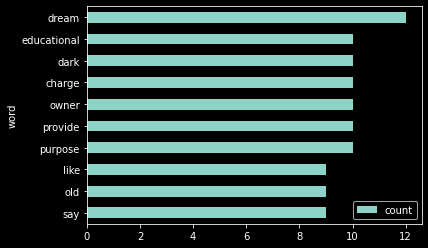

In [91]:
word_count_langston = pd.DataFrame({'word': vectorizer_langston.get_feature_names(), 'count': np.asarray(data_vectorized_langston.sum(axis=0))[0]})

word_count_langston.sort_values('count', ascending=False).set_index('word')[:10].sort_values('count', ascending=True).plot(kind='barh')

# Frequent words used in Mary J Oliver poems

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


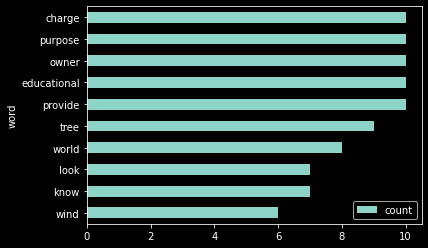

In [92]:
word_count_mary = pd.DataFrame({'word': vectorizer_mary.get_feature_names(), 'count': np.asarray(data_vectorized_mary.sum(axis=0))[0]})

word_count_mary.sort_values('count', ascending=False).set_index('word')[:10].sort_values('count', ascending=True).plot(kind='barh')

# NMF

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [94]:
no_topics = 3
no_top_words = 4
no_top_documents = 3

In [95]:
lh_df.columns

Index(['Title', 'Poem'], dtype='object')

In [136]:
documents_langston = []
documents_mary = []
for i in range(lh_df.shape[0]):
  documents_langston.append(lh_df['Poem'][i])

for i in range(mjo_df.shape[0]):
  documents_mary.append(mjo_df['Poem'][i])

In [ ]:
# document_langston = ""
# document_mary = ""
# for i in range(lh_df.shape[0]):
#   document_langston = documents_langston + lh_df['Poem'][i]

# for i in range(mjo_df.shape[0]):
#   document_mary = documents_mary + mjo_df['Poem'][i]

# documents_langston = {document_langston}
# documents_mary = {document_mary}

In [137]:
# Run NMF

def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([ (feature_names[i] + " (" + str(topic[i].round(2)) + ")")
          for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(str(doc_index) + ". " + documents[doc_index])

In [138]:
# Apply TFiDF
tfidf_vectorizer_langston = TfidfVectorizer(max_df=1.0, min_df=1, stop_words='english')
tfidf_langston = tfidf_vectorizer_langston.fit_transform(documents_langston)
tfidf_feature_names_langston = tfidf_vectorizer_langston.get_feature_names()

# Run NMF
nmf_model_langston = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_langston)
nmf_W_langston = nmf_model_langston.transform(tfidf_langston)
nmf_H_langston = nmf_model_langston.components_

print("NMF Topics")
display_topics(nmf_H_langston, nmf_W_langston, tfidf_feature_names_langston, documents_langston, no_top_words, no_top_documents)
print("--------------")

NMF Topics
Topic 0:
eat (0.3) company (0.19) america (0.19) poetryarchive (0.16)
2. too sing america am the darker brother they send me to eat in the kitchen when company comes but laugh and eat well and grow strong tomorrow will be at the table when company comes nobody will dare say to me eat in the kitchen then besides they will see how beautiful am and be ashamed— too am america http www poetryarchive org poetryarchive singlepoem do poemid listen to langston hughes read this poem recorded in by owner provided at no charge for educational purposes
5. have known rivers have known rivers ancient as the world and older than the flow of human blood in human veins my soul has grown deep like the rivers bathed in the euphrates when dawns were young built my hut near the congo and it lulled me to sleep looked upon the nile and raised the pyramids above it heard the singing of the mississippi when abe lincoln went down to new orleans and have seen its muddy bosom turn all golden in the suns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [113]:
# Apply TFiDF
tfidf_vectorizer_mary = TfidfVectorizer(max_df=1.0, min_df=1, stop_words='english')
tfidf_mary = tfidf_vectorizer_mary.fit_transform(documents_mary)
tfidf_feature_names_mary = tfidf_vectorizer_mary.get_feature_names()

# Run NMF
nmf_model_mary = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_mary)
nmf_W_mary = nmf_model_mary.transform(tfidf_mary)
nmf_H_mary = nmf_model_mary.components_

print("NMF Topics")
display_topics(nmf_H_mary, nmf_W_mary, tfidf_feature_names_mary, documents_mary, no_top_words, no_top_documents)
print("--------------")

NMF Topics
Topic 0:
just (0.16) time (0.15) earth (0.13) air (0.13)
5. next time what do is look at the earth before saying anything stop just before going into house and be an emperor for minute and listen better to the wind or to the air being still when anyone talked to me whether blame or praise or just passing time watch the face how the mouth has to work and see any strain any sign of what lifted the voice and for all know more the earth bracing itself and soaring the air finding every leaf and feather over forest and water and for every person the body glowing inside the clothes like light by owner provided at no charge for educational purposes
3. how necessary it is to have opinions think the spotted trout lilies are satisfied standing few inches above the earth think serenity is not something you just find in the world like plum tree holding up its white petals the violets along the river are opening their blue faces like small dark lanterns the green mosses being so many are 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


# Visualize NMF

In [103]:
# import pyLDAvis.sklearn

In [ ]:
# tfidf_langston = tfidf_langston.filter_extremes(no_below=2, no_above=1.0)

In [ ]:
# pyLDAvis.enable_notebook()

# pyLDAvis_data_langston = pyLDAvis.sklearn.prepare(nmf_model_langston, tfidf_langston, tfidf_vectorizer_langston)

# pyLDAvis.display(pyLDAvis_data_langston)

In [ ]:
# pyLDAvis.enable_notebook()

# pyLDAvis_data_mary = pyLDAvis.sklearn.prepare(nmf_model_mary, tfidf_mary, tfidf_vectorizer_mary)

# pyLDAvis.display(pyLDAvis_data_mary)

In [ ]:
# texts = mjo_df['Poem']

# # Create a dictionary
# # In gensim a dictionary is a mapping between words and their integer id
# dictionary = Dictionary(texts)

# # Filter out extremes to limit the number of features
# dictionary.filter_extremes(
#     no_below=3,
#     no_above=0.85,
#     keep_n=5000
# )

#Name the Topics

In [122]:
def topicModeling(text1):
  text1_list_orig = []
  bigram_text1 = []
  corpus_text1 = []

  text1_list_orig = [gensim.utils.simple_preprocess(text1)]
  bigram_text1 = gensim.models.Phrases(text1_list_orig) # higher threshold fewer phrases.
  trigram_text1 = gensim.models.Phrases(bigram_text1[text1_list_orig])
  #remove stop words
  remove_stop_text1 = remove_stopwords(text1_list_orig)
  # Form Bigrams
  data_words_bigrams_text1 = make_bigrams(remove_stop_text1, bigram_text1)
  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized_text1 = lemmatization(data_words_bigrams_text1, allowed_postags=['NOUN']) # , 'ADJ', 'VERB', 'ADV'
  id2word_text1 = corpora.Dictionary(data_lemmatized_text1)

  # Term Document Frequency
  corpus_text1 = [id2word_text1.doc2bow(text) for text in data_lemmatized_text1]
  lda_model_text1 = gensim.models.LdaMulticore(corpus=corpus_text1,
                                       id2word=id2word_text1,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  doc_lda_text1 = lda_model_text1[corpus_text1]
  return lda_model_text1, corpus_text1, data_lemmatized_text1, id2word_text1



# **Conclusion**
Based on the frequency count of words, below are the top 3 topic names for both the poets:   
**Langston Hughes:** 
1. dream
2. educational
3. dark   

**Mary J Oliver:**
1. owner
2. provide
3. purpose

Based on the LDA weights, below are the top 3 topic names for both the poets:      
**Langston Hughes:** 
1. little 
2. purpose 
3. letter  

**Mary J Oliver:**
1. voice
2. earth
3. purpose

Based on the NMF weights, below are the top 3 topic names for both the poets:      
**Langston Hughes:** 
1. little 
2. purpose 
3. letter  

**Mary J Oliver:**
1. voice
2. earth
3. purpose



<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Part 1: Summarization and Topics Modeling of Articles</h2>
</div>


1. Read large text:
  -- Google search for a topic 
  -- get list of top ten articles
2. extract into sentences ended with '.' [period]
3. write to a text file
4. read text file into list
5. summarize text using transformers 
   
   Find summaries -- see project details at end of notebook 
   
   try and plot comparisons of 5 combinations/permutations of the list sequence created in step 4 above
   to see the effects of chunking on the summarization
6. Do 2 distillations on the original article and the summary:
   topics, named entity recognition
   
   what are the top topics in each article? 
   what is the summary of each artcile?
   what are the named entities in each article? [NER] use gensim or spacy for this

Here , in the rest of the notebook is some sample code to get you started....
<li> Note: below we are using static text, not text that is the result of a google search

In [156]:
page1 = "https://apnews.com/article/entertainment-mary-oliver-new-york-north-america-1987c2078f61406aa961dd324b9a68c0"
page2 = "https://apnews.com/article/election-2020-virus-outbreak-ta-nehisi-coates-poetry-fiction-873ab4cfb9ea8ac3ee7a402ecbe38bff"
page3 = "https://www.newyorker.com/culture/postscript/mary-oliver-deep-direct-love-for-the-world"
page4 = "https://www.newyorker.com/books/page-turner/mary-oliver-helped-us-stay-amazed"
page5 = "https://www.newyorker.com/books/page-turner/mary-oliver-in-the-new-yorker"



output_file1 = "mjo_apnews_1"
output_file2 = "mjo_apnews_2"
output_file3 = "mjo_new_yorker_1"
output_file4 = "mjo_new_yorker_2"
output_file5 = "mjo_new_yorker_3"

pages = [page1,page2,page3,page4,page5]
output_files =[output_file1,output_file2,output_file3,output_file4,output_file5]

from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request
import nltk

# https://www.nltk.org/book/ch05.html

In [157]:
nltk.download('punkt')


def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

for x in range(len(pages)):

    html = urllib.request.urlopen(pages[x]).read()
    page_text =text_from_html(html)

    my_list = nltk.tokenize.sent_tokenize(page_text) #Split into list of sentences.
 
    textfile = open(output_files[x], "w")

    for element in my_list:
        textfile.write(element + "\n")
    textfile.close()

    print(page_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
AP NEWS Sections U.S. News World News Politics Sports Entertainment Business Technology Health Science Oddities Lifestyle Photography Videos Sections AP Top News U.S. News World News Africa Asia Pacific Australia Europe Latin America Middle East Politics President Biden Midterm elections Congress U.S. Supreme Court Sports MLB NBA NFL NHL Entertainment Film Reviews Movies Music Television Fashion Business Economy Financial markets Technology Health COVID-19 Science More AP Fact Check Lifestyle Religion Press Releases Oddities Photography Travel Russia-Ukraine war Trending News Gun violence French election COVID-19 Search ADVERTISEMENT https://apnews.com/article/north-america-entertainment-oh-state-wire-new-york-fl-state-wire-1987c2078f61406aa961dd324b9a68c0 Click to copy https://apnews.com/article/north-america-entertainment-oh-state-wire-new-york-fl-state-wire-1987c2078f61406a

### You can use the module below to read all the files in a folder

In [158]:
'''


# Import Module
import os

# Folder Path
path = "Folder Path"

# Change the directory
os.chdir(path)

# Read text File


def read_text_file(file_path):
	with open(file_path, 'r') as f:
		print(f.read())


# iterate through all file
for file in os.listdir():
	# Check whether file is in text format or not
	if file.endswith(".txt"):
		file_path = f"{path}\{file}"

		# call read text file function
		read_text_file(file_path)
        
'''


'\n\n\n# Import Module\nimport os\n\n# Folder Path\npath = "Folder Path"\n\n# Change the directory\nos.chdir(path)\n\n# Read text File\n\n\ndef read_text_file(file_path):\n\twith open(file_path, \'r\') as f:\n\t\tprint(f.read())\n\n\n# iterate through all file\nfor file in os.listdir():\n\t# Check whether file is in text format or not\n\tif file.endswith(".txt"):\n\t\tfile_path = f"{path}\\{file}"\n\n\t\t# call read text file function\n\t\tread_text_file(file_path)\n        \n'

## Next section adapted from source/reference [2] (see at end of notebook)

In [159]:
!pip install transformers

In [160]:
from transformers import pipeline
import os

In [161]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [162]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [163]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")
# see https://huggingface.co/t5-base

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [165]:
with open('mjo_new_yorker_3', 'r') as file:
    data = file.read().replace('\n', '')

In [166]:
def remove_quotes(mydata):
    new_data = mydata.strip('“”')
    return new_data
text = remove_quotes(data)

In [167]:
print (text)

Skip to main content Newsletter To revisit this article, select My Account, then  View saved stories Close Alert Sign In Search News Books & Culture Fiction & Poetry Humor & Cartoons Magazine Puzzles & Games Video Podcasts Archive Goings On Shop Open Navigation Menu To revisit this article, visit My Profile, then  View saved stories Close Alert Page-Turner Mary Oliver in The New Yorker By Hannah Aizenman January 19, 2019 Save this story for later.Save this story for later.The widely cherished American poet Mary Oliver died on Thursday, at the age of eighty-three.The poems she published in The New Yorker exemplify the themes and modes for which her work is best known, often addressing the awe of the natural world with studious lucidity, seeking—and finding—the sacred in communion with the commonplace.Whatever Mary Oliver set her attention to became alive, because it became a part of her life, which was a part of all life.Photograph by Molly Malone Cook Oliver’s earliest contributions to

In [168]:
len(text)

6666

In [169]:
print (len(text))
text1= text[0:3000]
print (text1)

6666
Skip to main content Newsletter To revisit this article, select My Account, then  View saved stories Close Alert Sign In Search News Books & Culture Fiction & Poetry Humor & Cartoons Magazine Puzzles & Games Video Podcasts Archive Goings On Shop Open Navigation Menu To revisit this article, visit My Profile, then  View saved stories Close Alert Page-Turner Mary Oliver in The New Yorker By Hannah Aizenman January 19, 2019 Save this story for later.Save this story for later.The widely cherished American poet Mary Oliver died on Thursday, at the age of eighty-three.The poems she published in The New Yorker exemplify the themes and modes for which her work is best known, often addressing the awe of the natural world with studious lucidity, seeking—and finding—the sacred in communion with the commonplace.Whatever Mary Oliver set her attention to became alive, because it became a part of her life, which was a part of all life.Photograph by Molly Malone Cook Oliver’s earliest contributio

## Design a chunking strategy : how do I chunk up the input text, so that I can maximize the quality of the resulting summary??

summarize every 2 sentences?
summarize every 1000 chars??
try 5 variations 

should I summarize the 5 summaries to get. a better summary???

do this for each article (e.g., 3 articles)

In [170]:
%%time
summary_text = summarizer(text1, max_length=512, min_length=5, do_sample=False)[0]['summary_text']
print(summary_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (791 > 512). Running this sequence through the model will result in indexing errors


the widely cherished american poet Mary Oliver died on tuesday, at the age of eighty-three . her poems exemplify the themes and modes for which her work is best known . "mushrooms" and "first snow" infuse vital imagery with the imminent promise of oblivion .
CPU times: user 1min 22s, sys: 3.06 s, total: 1min 25s
Wall time: 1min 3s


In [171]:
print (len(text))
text2= text[0:5000]
print (text2)

6666
Skip to main content Newsletter To revisit this article, select My Account, then  View saved stories Close Alert Sign In Search News Books & Culture Fiction & Poetry Humor & Cartoons Magazine Puzzles & Games Video Podcasts Archive Goings On Shop Open Navigation Menu To revisit this article, visit My Profile, then  View saved stories Close Alert Page-Turner Mary Oliver in The New Yorker By Hannah Aizenman January 19, 2019 Save this story for later.Save this story for later.The widely cherished American poet Mary Oliver died on Thursday, at the age of eighty-three.The poems she published in The New Yorker exemplify the themes and modes for which her work is best known, often addressing the awe of the natural world with studious lucidity, seeking—and finding—the sacred in communion with the commonplace.Whatever Mary Oliver set her attention to became alive, because it became a part of her life, which was a part of all life.Photograph by Molly Malone Cook Oliver’s earliest contributio

In [172]:
%%time
summary_text = summarizer(text2, max_length=512, min_length=5, do_sample=False)[0]['summary_text']
print(summary_text)

the widely cherished american poet Mary Oliver died on tuesday at the age of eighty-three . her poems address the awe of the natural world with studious lucidity . "it is heaven itself to take what is given, / to see what is plain," she writes .
CPU times: user 1min 31s, sys: 4.52 s, total: 1min 35s
Wall time: 1min 19s


In [173]:
%%time
print (len(text))
text3= text[0:8000]


summary_text = summarizer(text3, max_length=512, min_length=5, do_sample=False)[0]['summary_text']
print(summary_text)

6666
the widely cherished poet died on tuesday, at the age of eighty-three . her poems address the awe of the natural world with studious lucidity . "it is heaven itself to take what is given, / to see what is plain," she writes .
CPU times: user 1min 36s, sys: 3.07 s, total: 1min 39s
Wall time: 1min 24s


In [174]:
pip install --user -U nltk

     |████████████████████████████████| 1.5 MB 6.3 MB/s 
     |████████████████████████████████| 749 kB 44.3 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [175]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [176]:
from nltk.tokenize import word_tokenize
tokenized_text = word_tokenize(summary_text)
nltk.pos_tag(tokenized_text)

[('the', 'DT'),
 ('widely', 'RB'),
 ('cherished', 'VBN'),
 ('poet', 'NN'),
 ('died', 'VBN'),
 ('on', 'IN'),
 ('tuesday', 'NN'),
 (',', ','),
 ('at', 'IN'),
 ('the', 'DT'),
 ('age', 'NN'),
 ('of', 'IN'),
 ('eighty-three', 'JJ'),
 ('.', '.'),
 ('her', 'PRP$'),
 ('poems', 'NN'),
 ('address', 'IN'),
 ('the', 'DT'),
 ('awe', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('natural', 'JJ'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('studious', 'JJ'),
 ('lucidity', 'NN'),
 ('.', '.'),
 ('``', '``'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('heaven', 'VBN'),
 ('itself', 'PRP'),
 ('to', 'TO'),
 ('take', 'VB'),
 ('what', 'WP'),
 ('is', 'VBZ'),
 ('given', 'VBN'),
 (',', ','),
 ('/', 'VBZ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('what', 'WP'),
 ('is', 'VBZ'),
 ('plain', 'NN'),
 (',', ','),
 ("''", "''"),
 ('she', 'PRP'),
 ('writes', 'VBZ'),
 ('.', '.')]

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Part 2: NLP POS Substitutions and Tones for Poets</h2>
</div>

#### Find 2 poems from 2 poets for example Robert Bly and Emily Dickison (One each shown below)


<li> Pick a poem from two poets, A, B
<li> Do two distillations including:  POS, embeddings
    POS do the following 
    do embeddings to find which poets are closest to each other in style
<li> Store each POS for each poet
<li> replace poet A POS with poet B  POS based in semantic similarity 

In [180]:
lh={
    'title':'Mother To Son',
    'poem':"Well, son, I'll tell you: Life for me ain't been no crystal stair. It's had tacks in it, And splinters, And boards torn up, And places with no carpet on the floor— Bare. But all the time I'se been a-climbin' on, And reachin' landin's, And turnin' corners, And sometimes goin' in the dark Where there ain't been no light. So, boy, don't you turn back. Don't you set down on the steps. 'Cause you finds it's kinder hard. Don't you fall now— For I'se still goin', honey, I'se still climbin', And life for me ain't been no crystal stair.",
    'book': '',
    'verbs': ''
}

mjo={
    'title':'Yes! No!',
    'poem':'How necessary it is to have opinions! I think the spotted trout lilies are satisfied, standing a few inches above the earth. I think serenity is not something you just find in the world, like a plum tree, holding up its white petals. The violets, along the river, are opening their blue faces, like small dark lanterns. The green mosses, being so many, are as good as brawny. How important it is to walk along, not in haste but slowly, looking at everything and calling out Yes! No! The swan, for all his pomp, his robes of grass and petals, wants only to be allowed to live on the nameless pond. The catbrier is without fault. The water thrushes, down among the sloppy rocks, are going crazy with happiness. Imagination is better than a sharp instrument. To pay attention, this is our endless and proper work.',
    'book':''
}

# http://www.wisdomportal.com/Columba/EmilyDickinson-Dove.html
# https://www.poetryfoundation.org/poets/robert-bly

tokenized_text1 = word_tokenize(lh['poem'])
lh_pos= nltk.pos_tag(tokenized_text1)

tokenized_text2 = word_tokenize(mjo['poem'])
mjo_pos= nltk.pos_tag(tokenized_text2)

In [183]:
print (lh_pos)

[('Well', 'RB'), (',', ','), ('son', 'NN'), (',', ','), ('I', 'PRP'), ("'ll", 'MD'), ('tell', 'VB'), ('you', 'PRP'), (':', ':'), ('Life', 'NN'), ('for', 'IN'), ('me', 'PRP'), ('ai', 'VBP'), ("n't", 'RB'), ('been', 'VBN'), ('no', 'DT'), ('crystal', 'JJ'), ('stair', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('had', 'VBD'), ('tacks', 'NNS'), ('in', 'IN'), ('it', 'PRP'), (',', ','), ('And', 'CC'), ('splinters', 'NNS'), (',', ','), ('And', 'CC'), ('boards', 'NNS'), ('torn', 'VBN'), ('up', 'RP'), (',', ','), ('And', 'CC'), ('places', 'NNS'), ('with', 'IN'), ('no', 'DT'), ('carpet', 'NN'), ('on', 'IN'), ('the', 'DT'), ('floor—', 'NN'), ('Bare', 'NNP'), ('.', '.'), ('But', 'CC'), ('all', 'PDT'), ('the', 'DT'), ('time', 'NN'), ("I'se", 'NNP'), ('been', 'VBN'), ('a-climbin', 'JJ'), ("'", "''"), ('on', 'IN'), (',', ','), ('And', 'CC'), ('reachin', 'NN'), ("'", "''"), ('landin', 'NN'), ("'s", 'POS'), (',', ','), ('And', 'CC'), ('turnin', 'NN'), ("'", "''"), ('corners', 'NNS'), (',', ','), (

In [184]:
print (mjo_pos)

[('How', 'WRB'), ('necessary', 'JJ'), ('it', 'PRP'), ('is', 'VBZ'), ('to', 'TO'), ('have', 'VB'), ('opinions', 'NNS'), ('!', '.'), ('I', 'PRP'), ('think', 'VBP'), ('the', 'DT'), ('spotted', 'VBN'), ('trout', 'IN'), ('lilies', 'NNS'), ('are', 'VBP'), ('satisfied', 'JJ'), (',', ','), ('standing', 'VBG'), ('a', 'DT'), ('few', 'JJ'), ('inches', 'NNS'), ('above', 'IN'), ('the', 'DT'), ('earth', 'NN'), ('.', '.'), ('I', 'PRP'), ('think', 'VBP'), ('serenity', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('something', 'NN'), ('you', 'PRP'), ('just', 'RB'), ('find', 'VB'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), (',', ','), ('like', 'IN'), ('a', 'DT'), ('plum', 'NN'), ('tree', 'NN'), (',', ','), ('holding', 'VBG'), ('up', 'RP'), ('its', 'PRP$'), ('white', 'JJ'), ('petals', 'NNS'), ('.', '.'), ('The', 'DT'), ('violets', 'NNS'), (',', ','), ('along', 'IN'), ('the', 'DT'), ('river', 'NN'), (',', ','), ('are', 'VBP'), ('opening', 'VBG'), ('their', 'PRP$'), ('blue', 'NN'), ('faces', 'VBZ'), (',', ',')

# References


1. https://github.com/aarsanjani/nlp-poets
2. https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
3. https://sjsu.instructure.com/courses/1465859/assignments/5992374
4. https://colab.research.google.com/github/aneesha/googlecolab_topicmodeling/blob/master/colab_topicmodeling.ipynb
5.  https://towardsdatascience.com/semantic-similarity-using-transformers-8f3cb5bf66d6
6.  https://towardsdatascience.com/abstractive-summarization-using-pytorch-f5063e67510
7.  https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
8. https://medium.com/@muddaprince456/categorizing-and-pos-tagging-with-nltk-python-28f2bc9312c3
9.  https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
10. https://www.nltk.org/book/ch05.html